In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import heapq

In [3]:
df = pd.read_csv("./噪声对分类性能影响.csv")

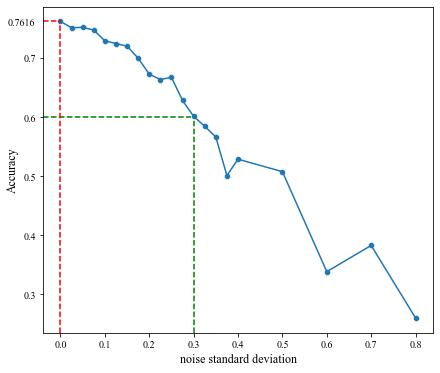

In [6]:
plt.figure(figsize=(7, 6))

sns.scatterplot(x="noise standard deviation", y="accuracy", data=df)
sns.lineplot(x="noise standard deviation", y="accuracy", data=df)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("noise standard deviation", fontsize=12)
plt.axvline(0.3, 0, 0.66, color="green", linestyle="--")
plt.axhline(0.6, 0, 0.38, color="green", linestyle="--")
plt.axvline(0.0, 0, 0.96, color="red", linestyle="--")
plt.axhline(0.7616, 0, 0.045, color="red", linestyle="--")
plt.text(-0.12, 0.755, "0.7616")
#plt.savefig("./噪声对分类性能的影响.svg", dpi=600, bbox_inches='tight')
plt.savefig("./噪声对分类性能影响图.pdf", dpi=600, bbox_inches='tight')

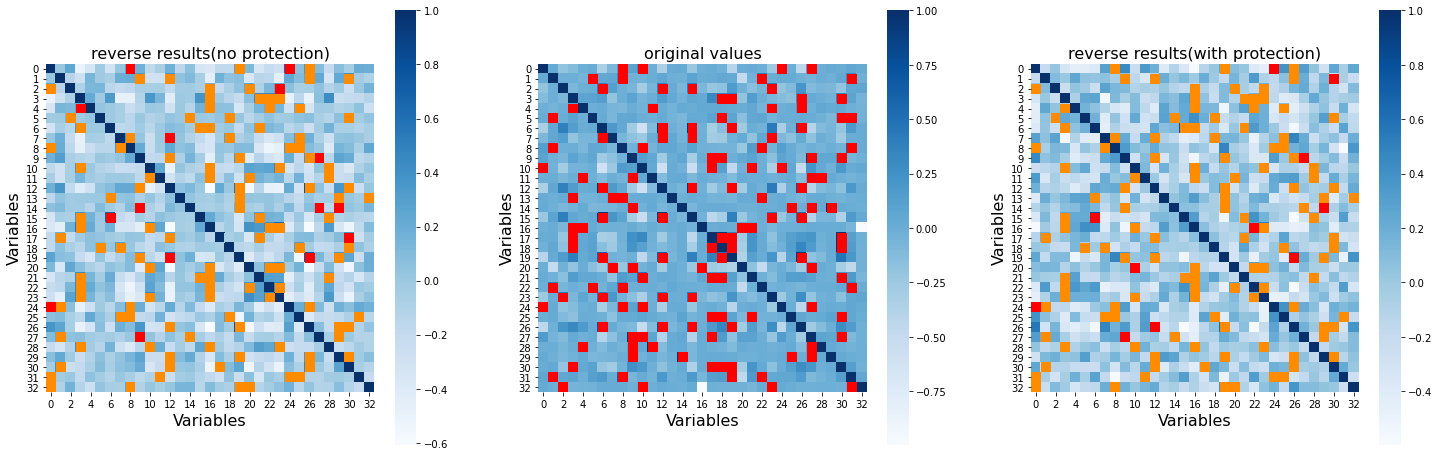

In [7]:
# 比较mia攻击结果与original的相对关系
# 定义一个函数，输入是一个相关系数矩阵，常值n。输出相关系数矩阵中每一行最大的N个数的下标。
def func(d, N):
    index_num = d.shape[0]
    output = np.zeros((index_num, N))
    for i in range(index_num):
        arr_max = heapq.nlargest(N, d[i, :])
        for j in range(N):
            output[i, j] = np.where(d[i, :]==arr_max[j])[0]
    return output

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
for i in range(9, 10):
    reverse_result = pd.read_csv("./reverse_result/600result_"+str(i)+".csv", index_col=0)
    d1 = reverse_result.corr()
    
    original = np.load(r"C:\Users\lzl_z\Desktop\python-workspace\论文\Data leakage and privacy protection in industrial federation learning\data\TE\classify\train_data.npy")[0+600*i:600+600*i, :]
    d2 = pd.DataFrame(index=range(600), columns=range(33), data=original).corr()

    reverse_result_protected = pd.read_csv("./reverse_result_protected/600result_"+str(i)+".csv", index_col=0)
    d3 = reverse_result_protected.corr()

    max_idx_arr1 = func(d1.values, 5)
    max_idx_arr2 = func(d2.values, 5)
    max_idx_arr3 = func(d3.values, 5)

    #axesSub = sns.heatmap(d1,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[i, 0])
    axesSub = sns.heatmap(d1,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[0])
    for x in range(max_idx_arr1.shape[0]):
        for y in range(1, max_idx_arr1.shape[1]):
            if max_idx_arr1[x, y] == max_idx_arr2[x, y]:
                rect = patches.Rectangle((max_idx_arr1[x,y], x), 1, 1, linewidth=2, edgecolor='none', facecolor='r', fill=True)
            else:
                rect = patches.Rectangle((max_idx_arr1[x,y], x), 1, 1, linewidth=2, edgecolor='none', facecolor='darkorange', fill=True)
            axesSub.add_patch(rect)
    axesSub.set_title("reverse results(no protection)", fontsize=16)
    axesSub.set_xlabel("Variables", fontsize=16)
    axesSub.set_ylabel("Variables", fontsize=16)

    #axesSub = sns.heatmap(d2,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[i, 1])
    axesSub = sns.heatmap(d2,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[1])
    for x in range(max_idx_arr2.shape[0]):
        for y in range(1, max_idx_arr2.shape[1]):
            rect = patches.Rectangle((max_idx_arr2[x,y], x), 1, 1, linewidth=2, edgecolor='none', facecolor='r', fill=True)
            axesSub.add_patch(rect)
    axesSub.set_title("original values", fontsize=16)
    axesSub.set_xlabel("Variables", fontsize=16)
    axesSub.set_ylabel("Variables", fontsize=16)
   
    #axesSub = sns.heatmap(d3,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[i, 2])
    axesSub = sns.heatmap(d3,annot = False,vmax = 1,square = True,cmap = "Blues",ax=ax[2])
    for x in range(max_idx_arr3.shape[0]):
        for y in range(1, max_idx_arr3.shape[1]):
            if max_idx_arr3[x, y] == max_idx_arr2[x, y]:
                rect = patches.Rectangle((max_idx_arr1[x,y], x), 1, 1, linewidth=2, edgecolor='none', facecolor='r', fill=True)
            else:
                rect = patches.Rectangle((max_idx_arr1[x,y], x), 1, 1, linewidth=2, edgecolor='none', facecolor='darkorange', fill=True)
            axesSub.add_patch(rect)
    axesSub.set_title("reverse results(with protection)", fontsize=16)
    axesSub.set_xlabel("Variables", fontsize=16)
    axesSub.set_ylabel("Variables", fontsize=16)

plt.savefig("./相对值比较-5-9.pdf", dpi=200, bbox_inches='tight')
plt.show()


In [24]:
for k in range(21):
    print(sum(max_idx_arr1[k, 1:5]==max_idx_arr2[k, 1:5])/4*100)

50.0
0.0
25.0
0.0
25.0
0.0
0.0
25.0
0.0
25.0
0.0
0.0
0.0
0.0
75.0
25.0
0.0
25.0
0.0
50.0
0.0
